In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [3]:
df = pd.read_csv('../DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**sex : 1 = Male , 0=Female**

----
----

**cp : Chest Pain**

**Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina**

**Value 1: typical angina || Value 2: atypical angina || Value 3: non-anginal pain || 4: asymptomatic**

----
----

**threstbps :Resting blood pressure ( Normal pressure with no exercise )**

-----
----

**chol: serum cholestoral in mg/dl**

**Cholesterol means the blockage for blood supply in the blood vessels**

----
----

**fbs: fasting blood sugar > 120 mg/dl**

**(1 = true; 0 = false) blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.**

----
----

**restecg: resting electrocardiographic results (values 0,1,2)**

**ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening**

----
----

**oldpeak = ST depression induced by exercise relative to rest**

**ST Depression is the difference between value of ECG at rest and after exercise.
An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches**

----
----

**slope:   the slope of the peak exercise ST segment**

**Value 1: upsloping — Value 2: flat — Value 3: downsloping**

----
----

**ca:  number of major vessels (0-3) colored by flourosopy**

**Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope (/ˈflʊərəskoʊp/) allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched**

-----
-----

**thal:The Types of thalassemia**

**(3 = normal; 6 = fixed defect; 7 = reversable defect)**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

### Data Exploration

**The goal here is to gain more information from the data:**

* What are you trying to solve ?

* What kind of data we have and how to treat different types ?

* What is missing from the data and how to deal with it ?

* Where are the outliers and why should you care about them?

* How can you add, change or remove features to get more out of your data ?

In [8]:
# How many class we have
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

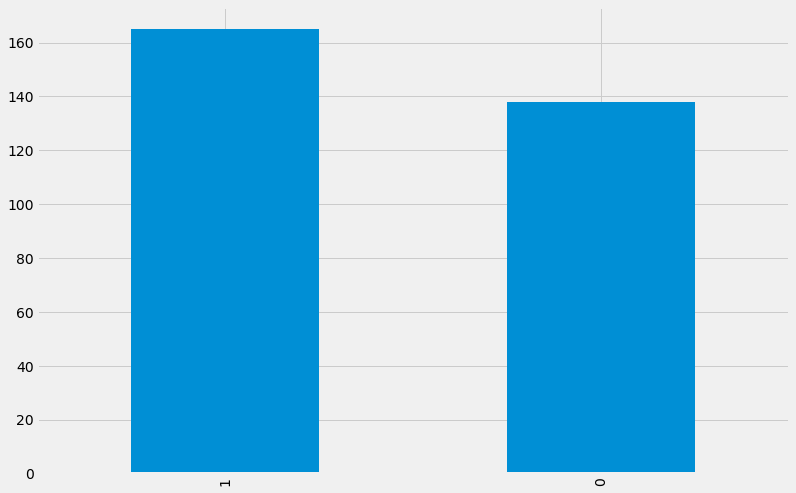

In [14]:
df["target"].value_counts().plot(kind = "bar")

In [9]:
#checking for null values

df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

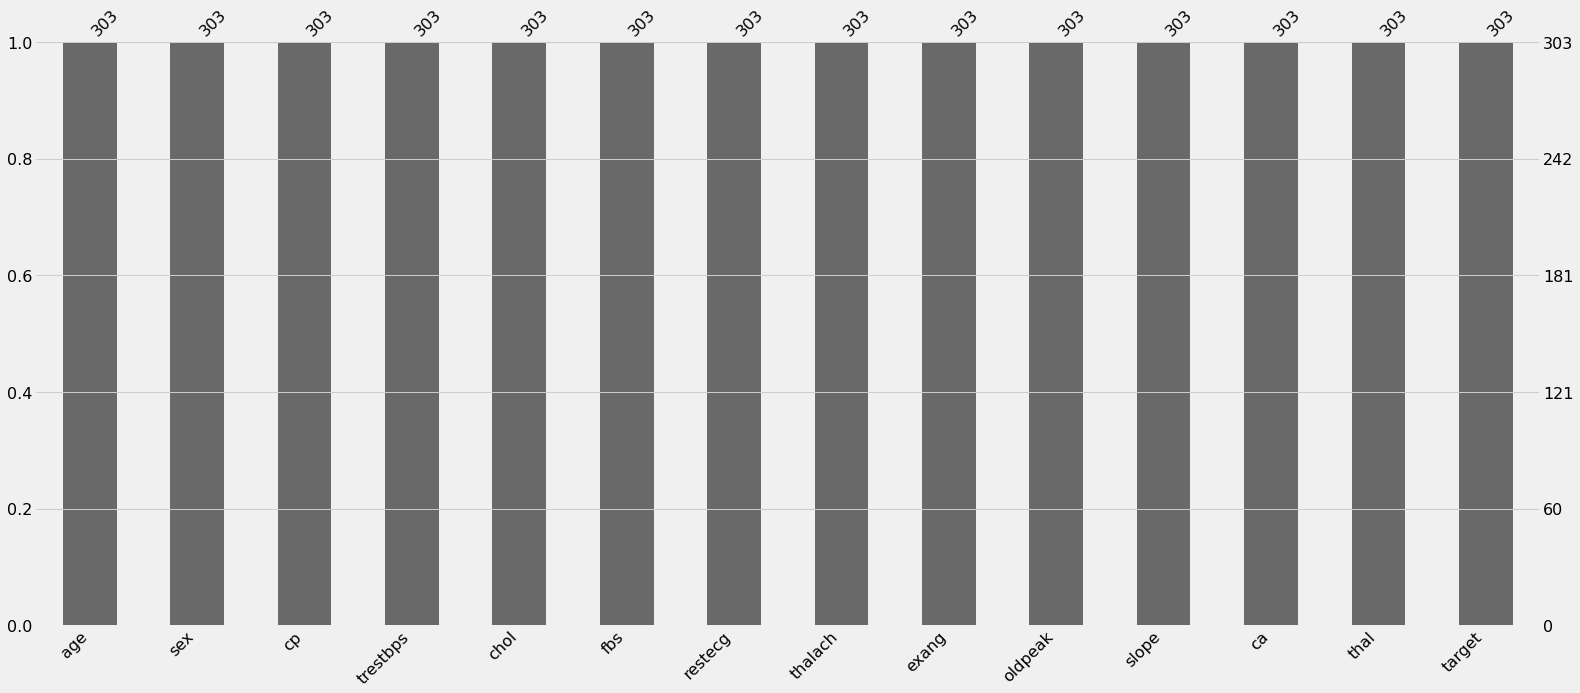

In [10]:
#checking null values via plot

import missingno as msno

msno.bar(df)

**Looks like we don't have any values** 

<AxesSubplot:>

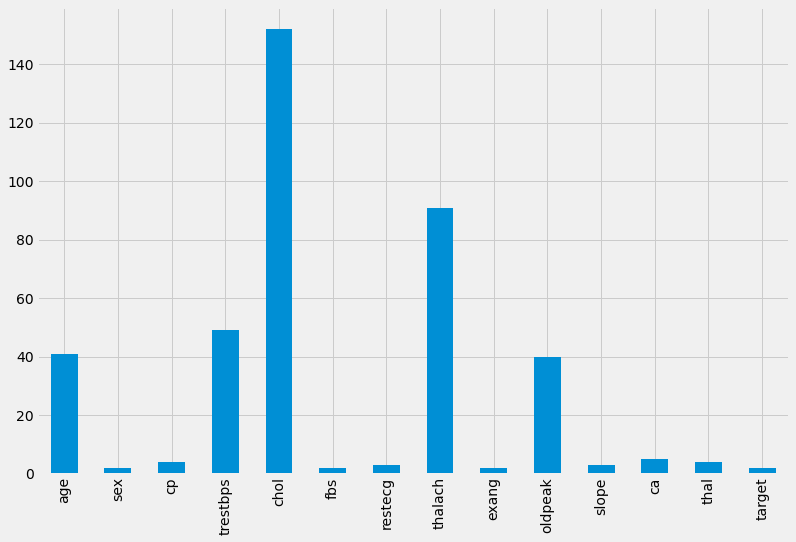

In [11]:
#checking for kditinct values in each column

df.apply(lambda x:len(x.unique())).plot(kind='bar')

In [12]:
#unique values in various features

print('cp ',df['cp'].unique())
print('fbs ',df['fbs'].unique())
print('restecg ',df['restecg'].unique())
print('exang ',df['exang'].unique())
print('slope ',df['slope'].unique())
print('ca ',df['ca'].unique())
print('thal ',df['thal'].unique())

cp  [3 2 1 0]
fbs  [1 0]
restecg  [0 1 2]
exang  [0 1]
slope  [0 2 1]
ca  [0 2 1 3 4]
thal  [1 2 3 0]


In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


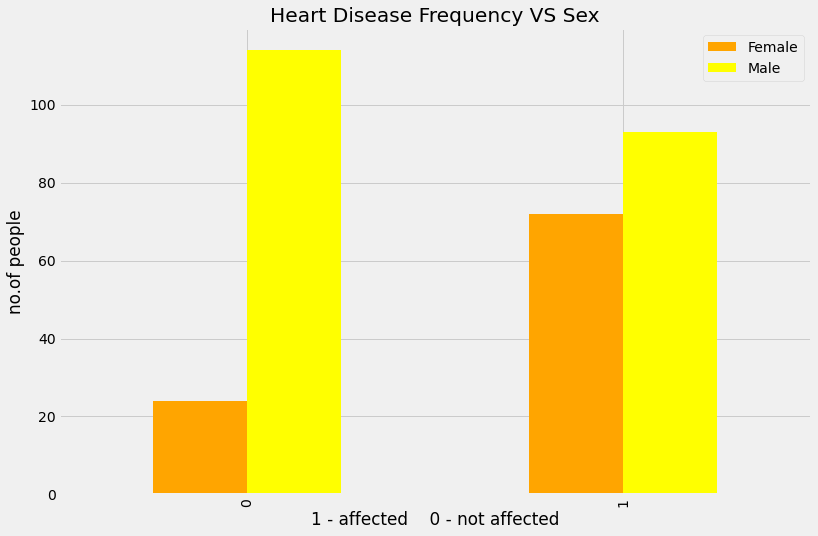

In [20]:
# ploting the cross tab

pd.crosstab(df.target,df.sex).plot(kind = "bar",color=["orange","yellow"]);
plt.title("Heart Disease Frequency VS Sex")
plt.xlabel("1 - affected    0 - not affected")
plt.ylabel("no.of people")
plt.legend(["Female","Male"]);

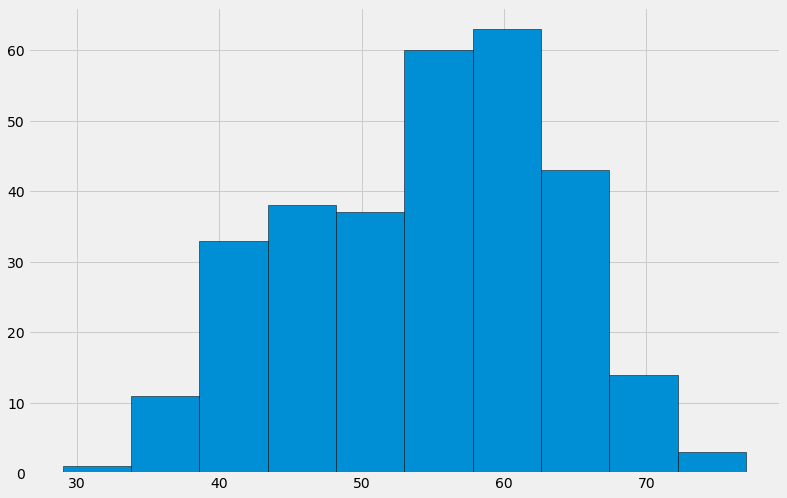

In [22]:
plt.hist(df['age'], bins=None, range=None, density=False, ec='black');

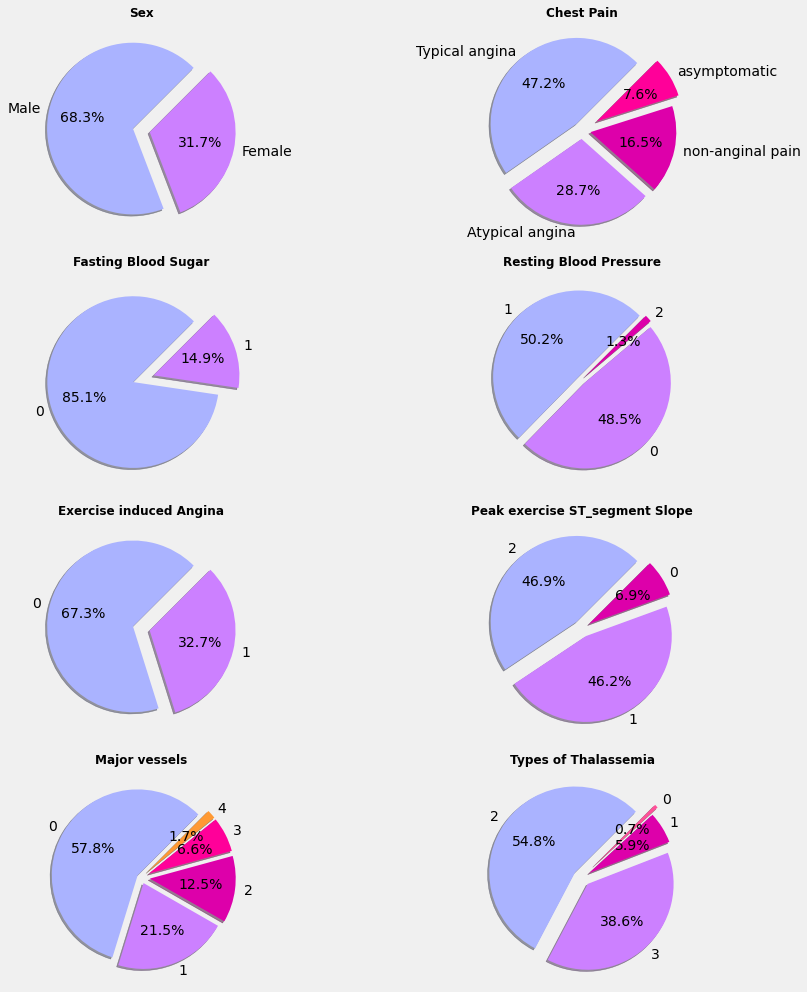

<Figure size 864x576 with 0 Axes>

In [23]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = df['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = df['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['fbs'].value_counts().index.tolist()[:2]
values = df['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['restecg'].value_counts().index.tolist()[:3]
values = df['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['exang'].value_counts().index.tolist()[:2]
values = df['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['slope'].value_counts().index.tolist()[:3]
values = df['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['ca'].value_counts().index.tolist()[:5]
values = df['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1,0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099','#FF9933'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['thal'].value_counts().index.tolist()[:4]
values = df['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.2],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF5099'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

plt.savefig("PiePlots.png")

**relationship between age and heart disease**

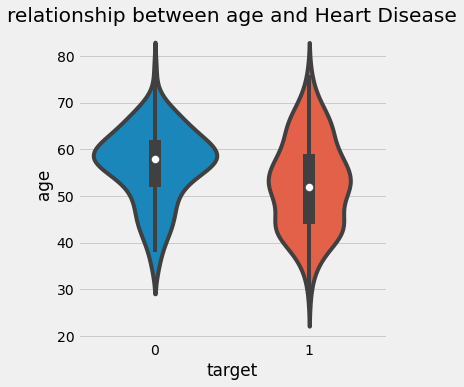

In [24]:
sns.catplot('target','age',data=df,kind='violin')
plt.title('relationship between age and Heart Disease')
plt.savefig("age.png")

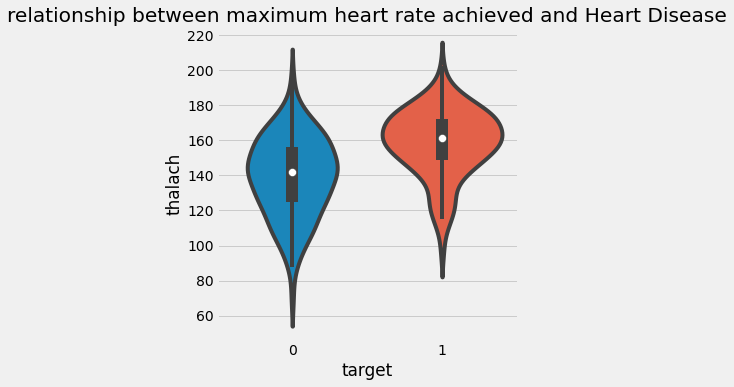

In [25]:
sns.catplot('target','thalach',data=df,kind='violin')
plt.title('relationship between maximum heart rate achieved and Heart Disease')
plt.savefig("thalach.png")

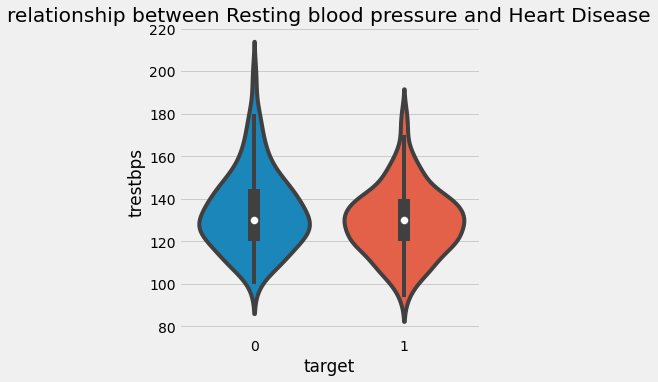

In [26]:
sns.catplot('target','trestbps',data=df,kind='violin')
plt.title('relationship between Resting blood pressure and Heart Disease')
plt.savefig("trestbps.png")

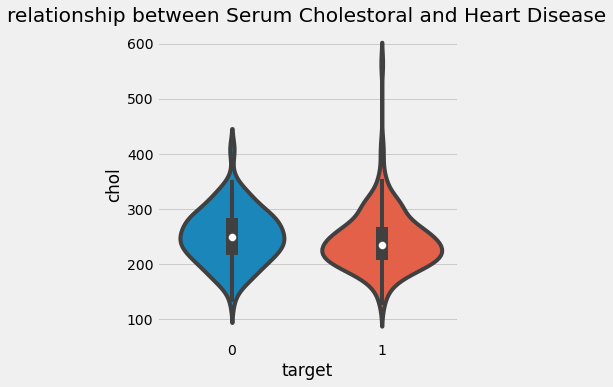

In [27]:
sns.catplot('target','chol',data=df,kind='violin')
plt.title('relationship between Serum Cholestoral and Heart Disease')
plt.savefig("chol.png")

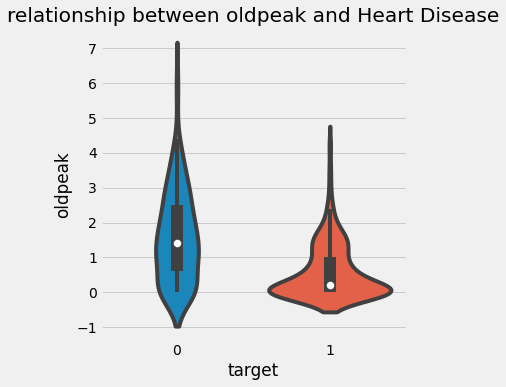

In [28]:
sns.catplot('target','oldpeak',data=df,kind='violin')
plt.title('relationship between oldpeak and Heart Disease')
plt.savefig("oldpeak.png")

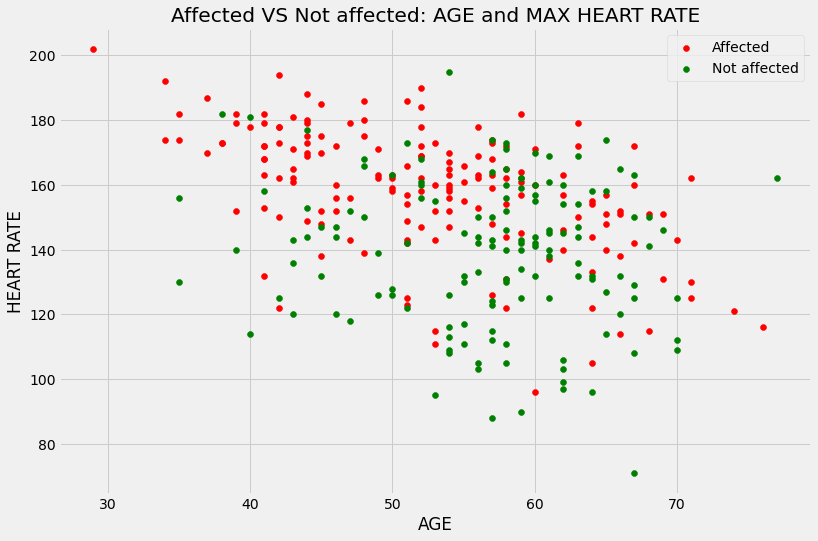

In [29]:
# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="red")

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="green")

# Labeling
plt.title("Affected VS Not affected: AGE and MAX HEART RATE")
plt.xlabel("AGE")
plt.ylabel("HEART RATE")
plt.legend(["Affected","Not affected"]);

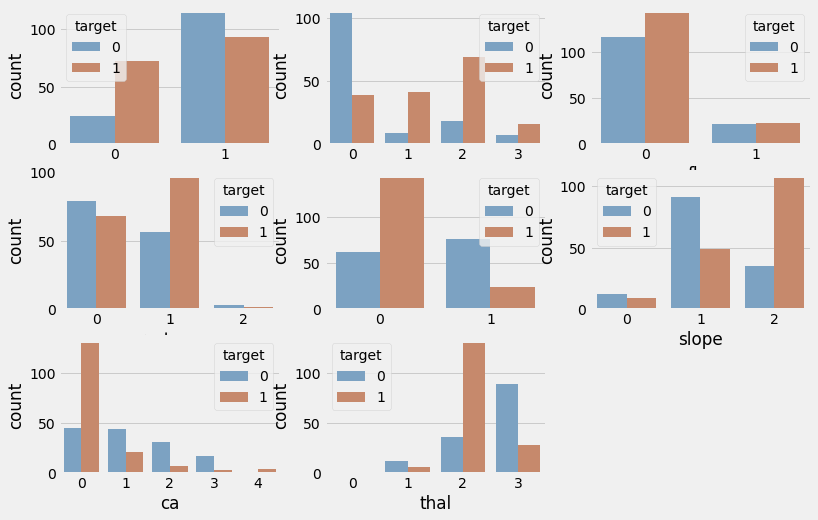

In [31]:
list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
m=1
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=df,hue='target',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
plt.savefig("TargetRelation.png")

### Correlation between the Attributes and the target


In [33]:
# Tabular format
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


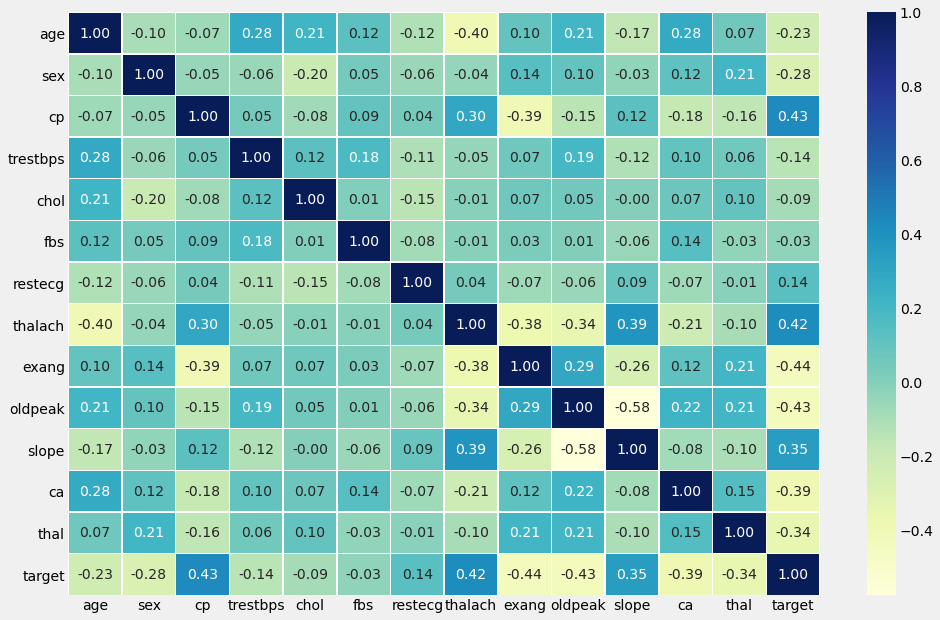

In [34]:
# Visual format
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

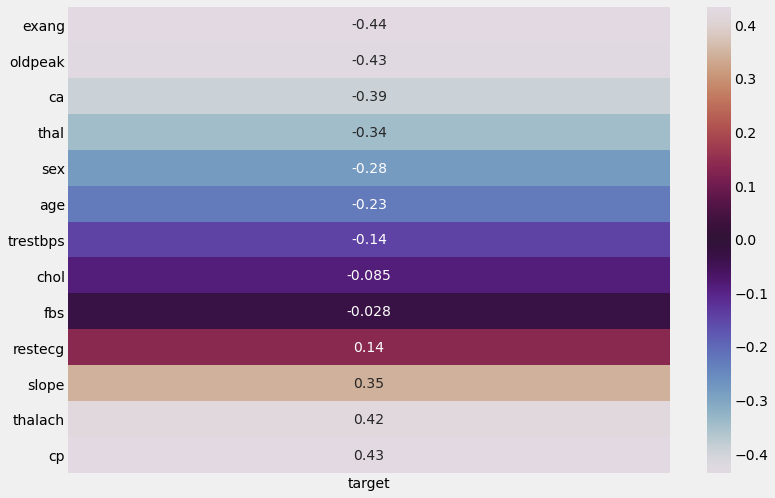

In [35]:
sns.heatmap(pd.DataFrame(df.corr()['target']).sort_values(by='target').transpose().drop('target',axis=1).transpose(),annot=True,cmap='twilight')
plt.savefig("TargetCorrelations.png")

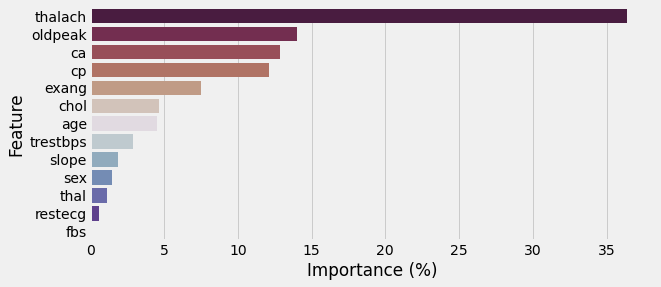

In [36]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

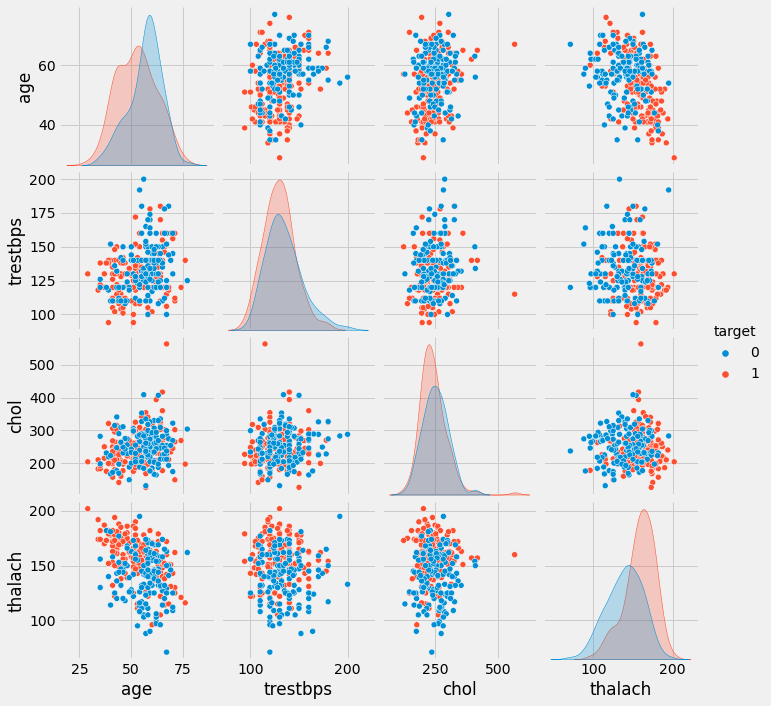

In [37]:
# Running pairplot on everything will take a very long time to render!
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

### Modeling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR


from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [73]:
X = df.drop('target',axis=1)
y = df['target']

In [74]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [76]:
# Split the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [78]:
# Put models in a dictionary
models = {
          "Logistic Regression": LogisticRegression(solver='liblinear'), 
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [79]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

**Logistic regression**

let's see the coefficient for each features.

In [89]:
from sklearn.linear_model import LogisticRegressionCV 
log_model = LogisticRegressionCV()
log_model.fit(X_train,y_train)

LogisticRegressionCV()

In [90]:
print(log_model.C_)
print(log_model.get_params())

[2.7825594]
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}


In [91]:
log_model.coef_

array([[ 0.0132779 , -1.44042715,  0.74159866, -0.00756815, -0.00378974,
        -0.4685057 ,  0.31656136,  0.03108143, -0.82057365, -0.51008937,
         0.22018663, -0.88119038, -0.6889626 ]])

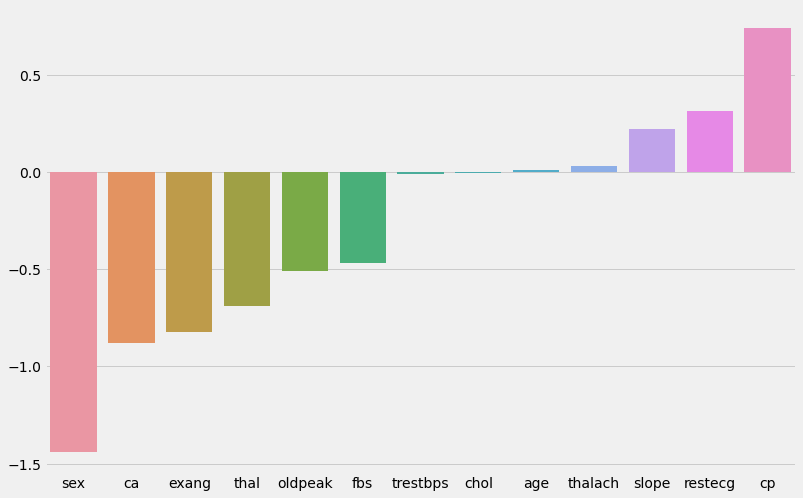

In [92]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

coefs = coefs.sort_values()
sns.barplot(x=coefs.index,y=coefs.values);

## SVM

In [80]:
svm = SVC(C=8.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.01,
    shrinking=True,
    probability=True,
    tol=0.1,
    cache_size=300,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovo')
svm.fit(X_train,Y_train)
Y_pred_svm = svm.predict(X_test)       
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
score_svm

70.49

In [83]:
Y_pred_svm = np.around(Y_pred_svm)
print(classification_report(Y_test,Y_pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        27
           1       0.70      0.82      0.76        34

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.69        61
weighted avg       0.71      0.70      0.70        61



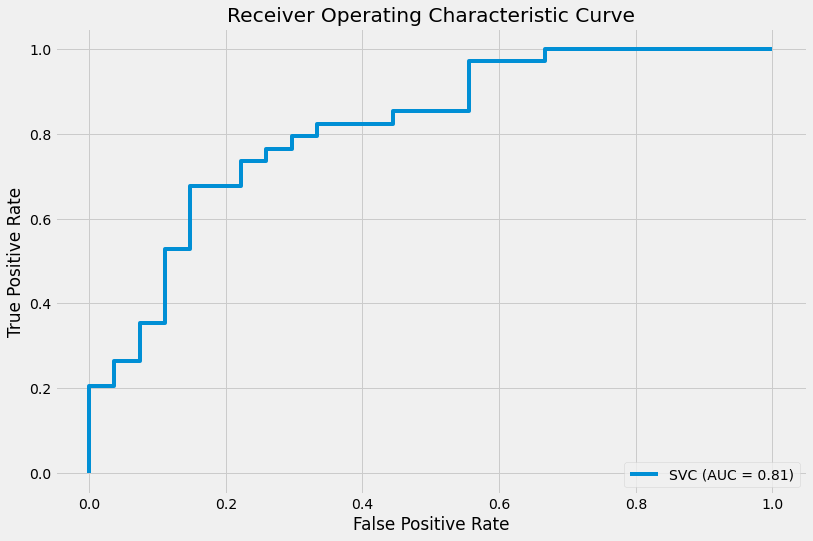

In [84]:
plot_roc_curve(svm,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("SVC.png")

## Naive Byes

In [85]:
gnb = GaussianNB( var_smoothing=1e-50)
gnb.fit(X_train,Y_train)
gnb.predict(X_test)
Y_pred_gnb = gnb.predict(X_test)          
score_gnb = round(accuracy_score(Y_pred_gnb,Y_test)*100,2)
score_gnb

85.25

In [86]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



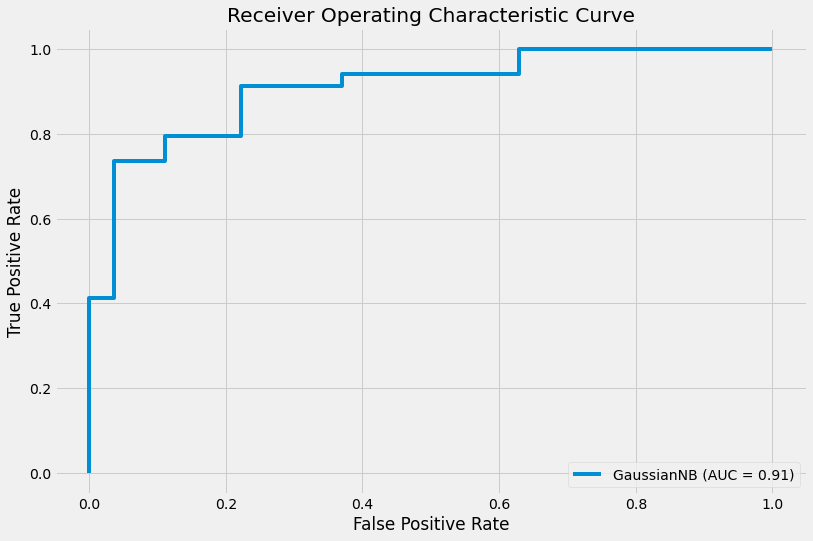

In [87]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

## RandomForest Classifier

In [109]:
max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

90.16
323


In [110]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(61,)

In [111]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

90.16

In [112]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



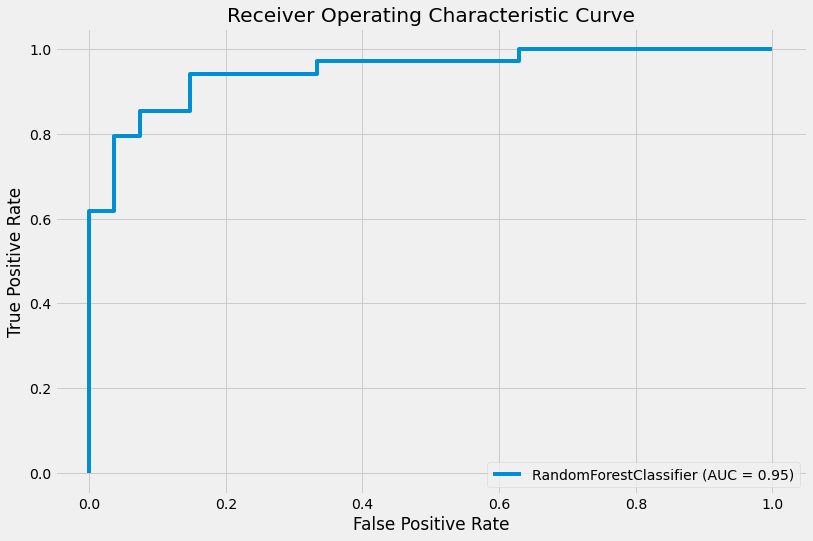

In [113]:
plot_roc_curve(rf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF.png")

## RandomForestClassifier with GridSearch

In [93]:
param_grid ={
    'max_depth': [10, 20, 30, 40,50,60,70],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [20, 40,60,80 ]
}

RFclf = RandomForestClassifier(max_depth=10, n_estimators=20)
grid = GridSearchCV(estimator=RFclf, param_grid=param_grid, cv = 4, n_jobs=-1,verbose=2)
grid_result = grid.fit(X_train, Y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 56 candidates, totalling 224 fits
Best: 0.835041 using {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 40}


In [94]:
model=grid_result.best_estimator_
model

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=40)

In [95]:
Y_pred_RFclf=model.predict(X_test)
score_RFclf = round(accuracy_score(Y_pred_RFclf,Y_test)*100,2)
score_RFclf

88.52

In [96]:
Y_pred_RFclf = np.around(Y_pred_RFclf)
print(metrics.classification_report(Y_test,Y_pred_RFclf))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



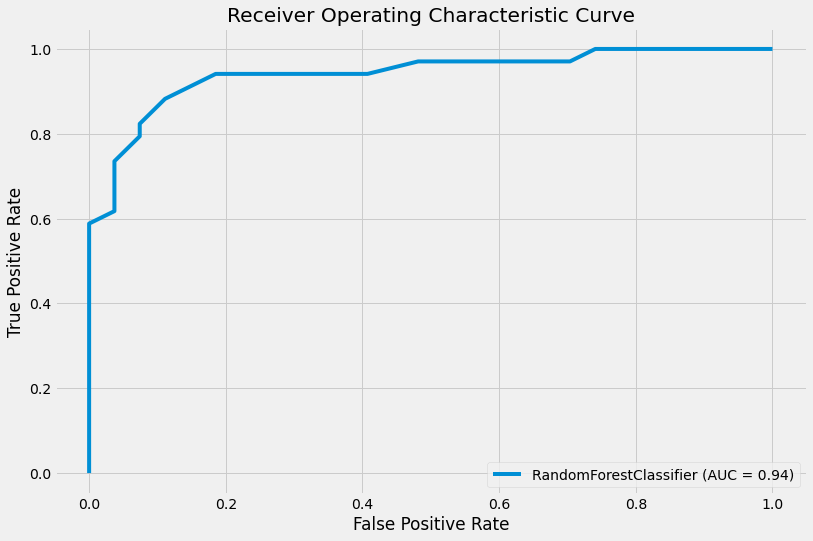

In [97]:
plot_roc_curve(model,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF_GridSearch.png")

## Decision Tree Classifier

In [98]:
tclf = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='auto',
    random_state=46)
tclf.fit(X_train, Y_train)
Y_pred_tclf=tclf.predict(X_test)
score_tclf = round(accuracy_score(Y_pred_tclf,Y_test)*100,2)
score_tclf

83.61

In [99]:
Y_pred_tclf = np.around(Y_pred_tclf)
print(metrics.classification_report(Y_test,Y_pred_tclf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



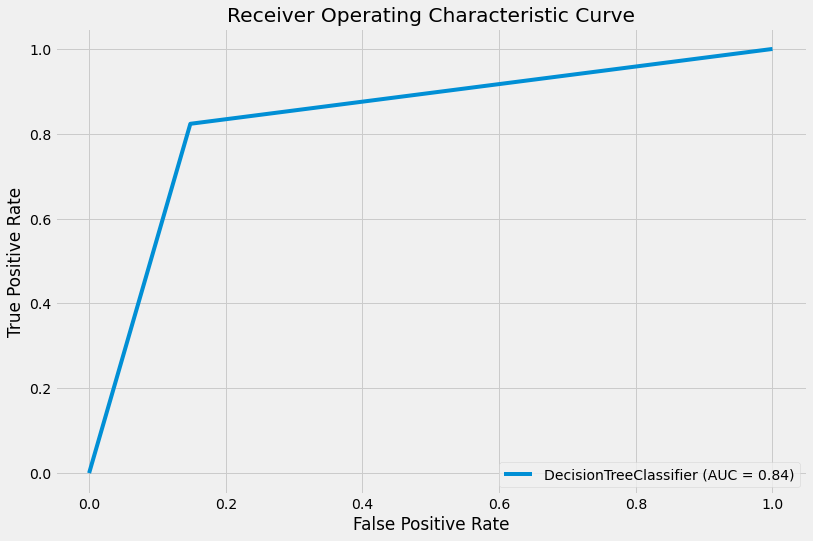

In [100]:
plot_roc_curve(tclf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

**KNN**

In [103]:
kclf = KNeighborsClassifier(n_neighbors=31,leaf_size=30)
kclf.fit(X_train,Y_train)
Y_pred_kclf = kclf.predict(X_test)
score_kclf = round(accuracy_score(Y_pred_kclf,Y_test)*100,2)
score_kclf

68.85

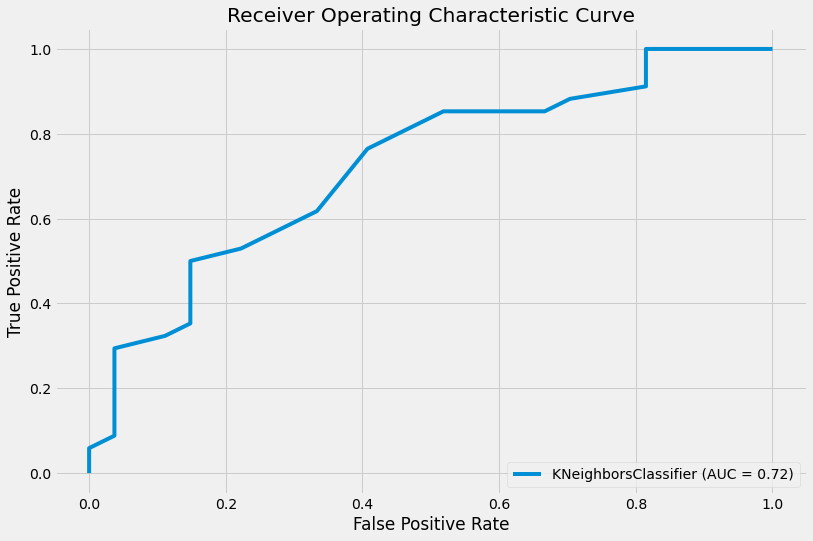

In [104]:
plot_roc_curve(kclf,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("KNN.png")

**logistic regression**

In [105]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 
y_pred_lr = np.around(Y_pred_lr)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

85.25

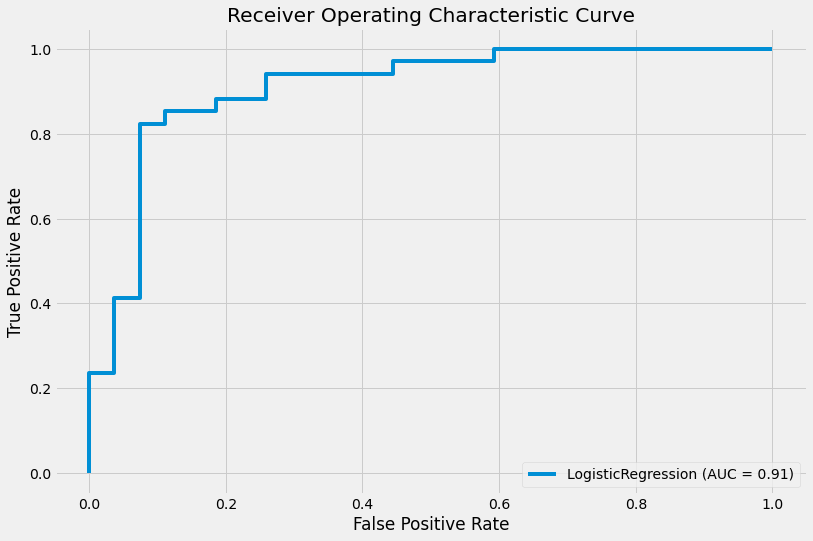

In [106]:
plot_roc_curve(LL,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("LR.png")

In [107]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## XGBoost

In [115]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)
                              
xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

[20:57:10] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, loss, min_impurity_decrease, min_samples_leaf, min_samples_split, min_weight_fraction_leaf, presort, tol, validation_fraction, verbose, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:57:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


81.97

In [116]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



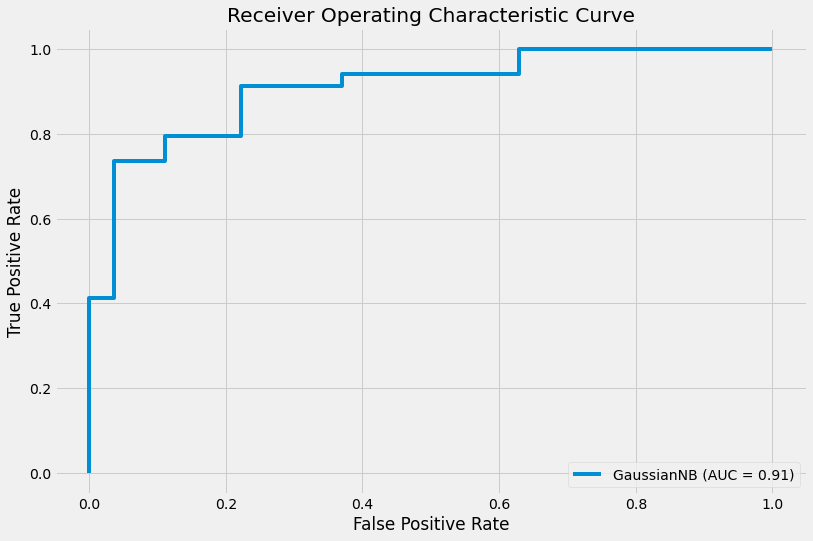

In [117]:
plot_roc_curve(gnb,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

## final score of models

In [118]:
scores = [score_lr,score_kclf,score_svm,score_gnb,score_RFclf,score_rf,score_xgb,score_tclf]
Models = ["Logistic Regression","KNN CLF","Support Vector Machine","Gaussian Navie Bayes","Random Forest with GridSearch","Random Forest","XGBoost","Decision Tree"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using KNN CLF is: 68.85 %
The accuracy score achieved using Support Vector Machine is: 70.49 %
The accuracy score achieved using Gaussian Navie Bayes is: 85.25 %
The accuracy score achieved using Random Forest with GridSearch is: 88.52 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 81.97 %
The accuracy score achieved using Decision Tree is: 83.61 %


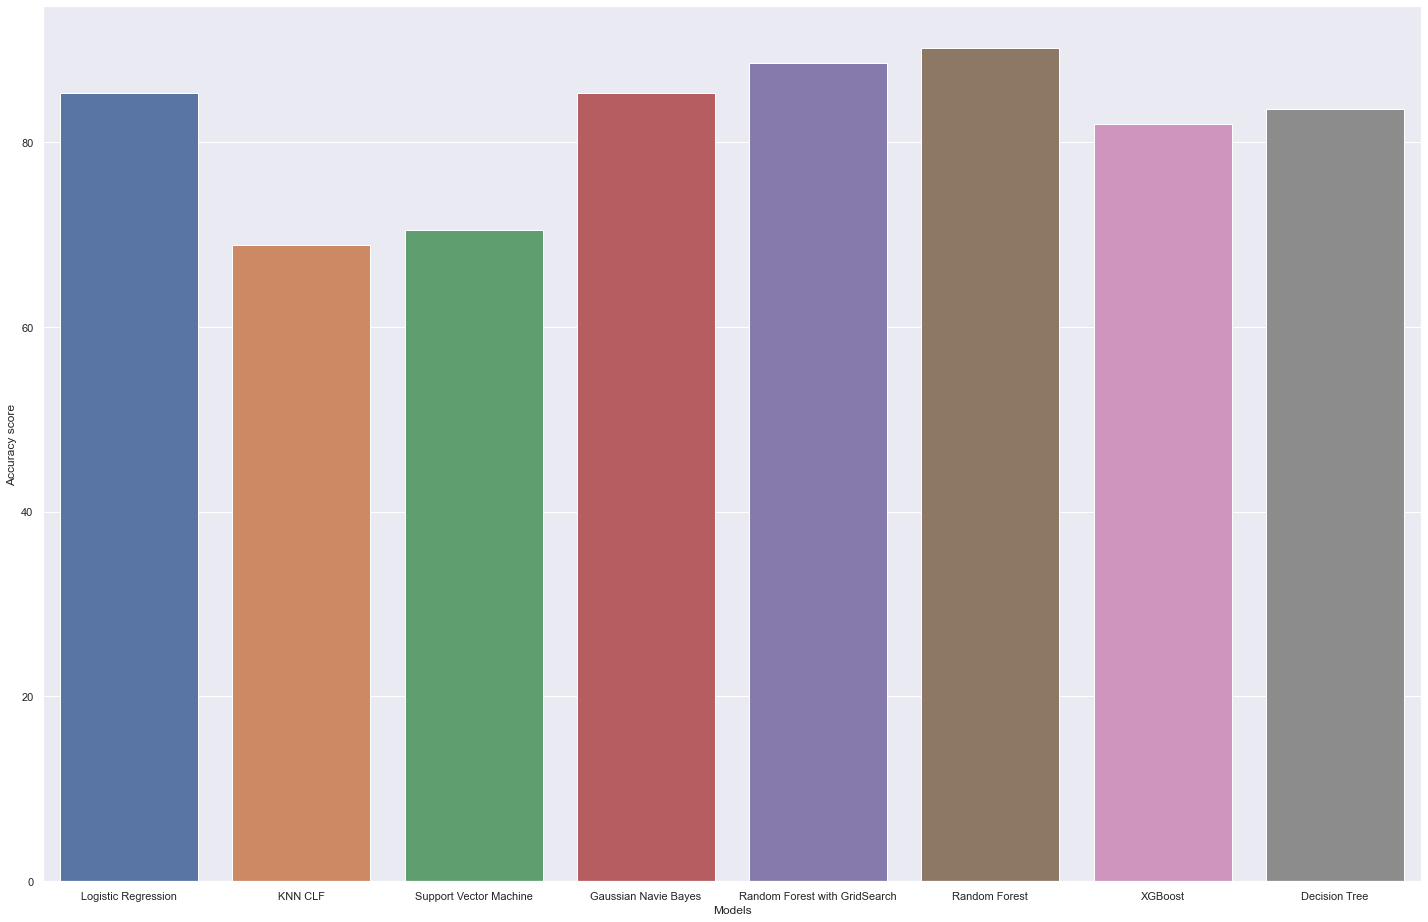

In [121]:
plt.figure(figsize=(22,15))
sns.set(style="darkgrid")
plt.xlabel("Models",loc='center')
plt.ylabel("Accuracy score")

sns.barplot(Models,scores)
plt.savefig("AccuracyScores.png")

**Since Random forest Classifier gets the best result, We will use it as our main model**

In [126]:
#lets evalute our model with an example

np.random.randint(1,100)

8

In [130]:
#let's choose 8th instance of dataset

df.iloc[8]

age          52.0
sex           1.0
cp            2.0
trestbps    172.0
chol        199.0
fbs           1.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.5
slope         2.0
ca            0.0
thal          3.0
target        1.0
Name: 8, dtype: float64

In [131]:
Input = (52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease by %f "%(prediction))

[1]
The Person will has a Heart Disease by 1.000000 


### orignally the person has a heart disease and our model also predicted it as a heart disease with a confidence level of 100%